<a href="https://colab.research.google.com/github/jibbsmathew/Car_Dataset_SVM_Classification/blob/main/Glass_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib==3.1.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os, sys, itertools, re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy import mean
import sklearn.model_selection as models
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import timeit
from sklearn.utils.multiclass import unique_labels

In [ ]:
if 'google.colab' in sys.modules:    
    project_path =  "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data[10].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: 10, dtype: int64

In [ ]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
data.columns = names
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data = data.drop('Id',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
data.dtypes

RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

In [ ]:
#Checking outlies through Z-score
from scipy import stats

z = abs(stats.zscore(data))

#np.where(z > 3)

data = data[(z < 3).all(axis=1)]

In [ ]:

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = data[features]

y = data[label]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


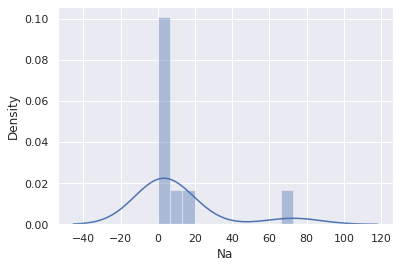

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


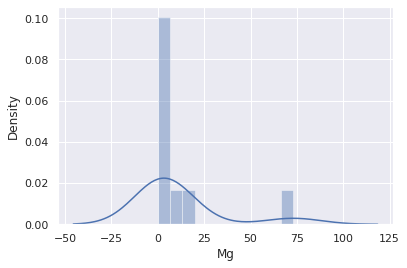

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


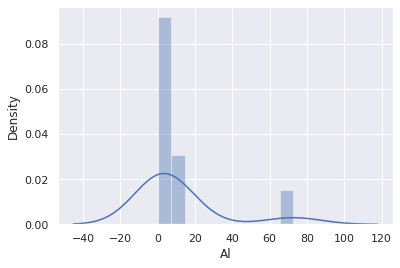

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


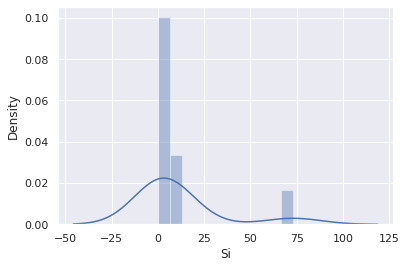

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


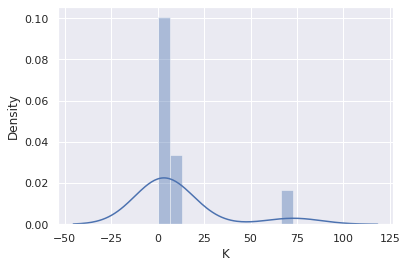

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


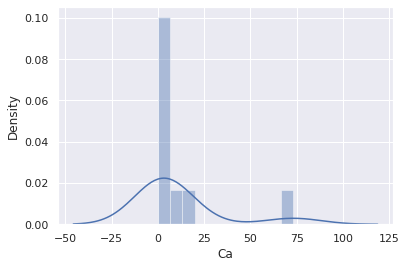

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


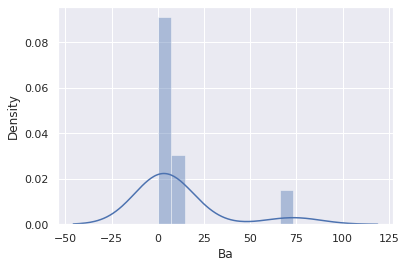

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


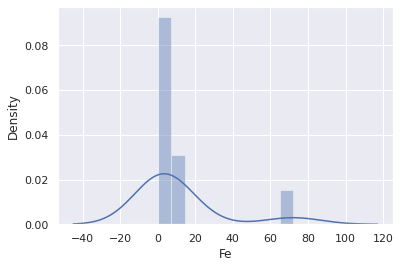

In [ ]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()


<Figure size 576x576 with 0 Axes>

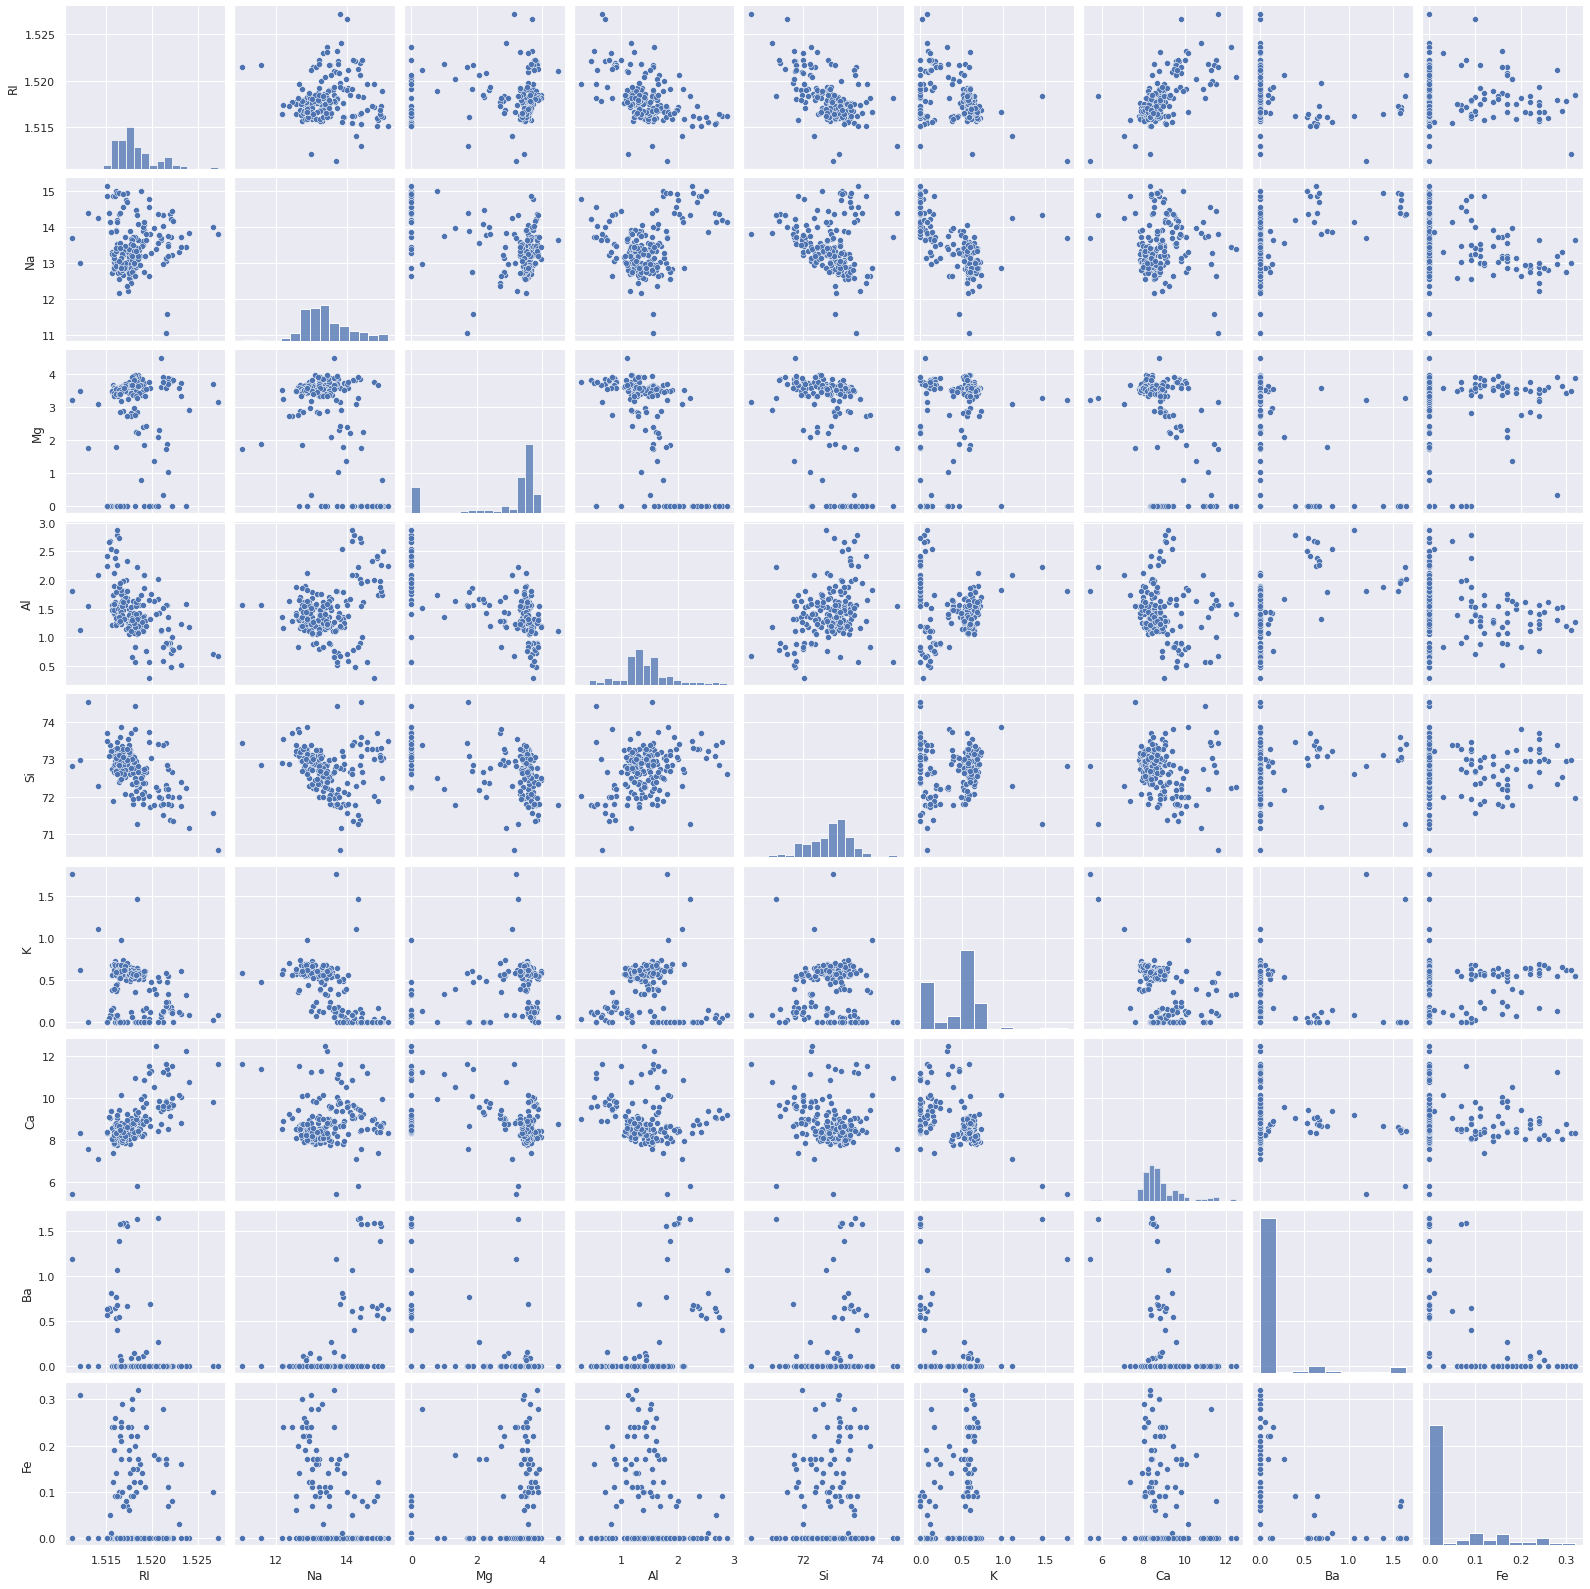

In [ ]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

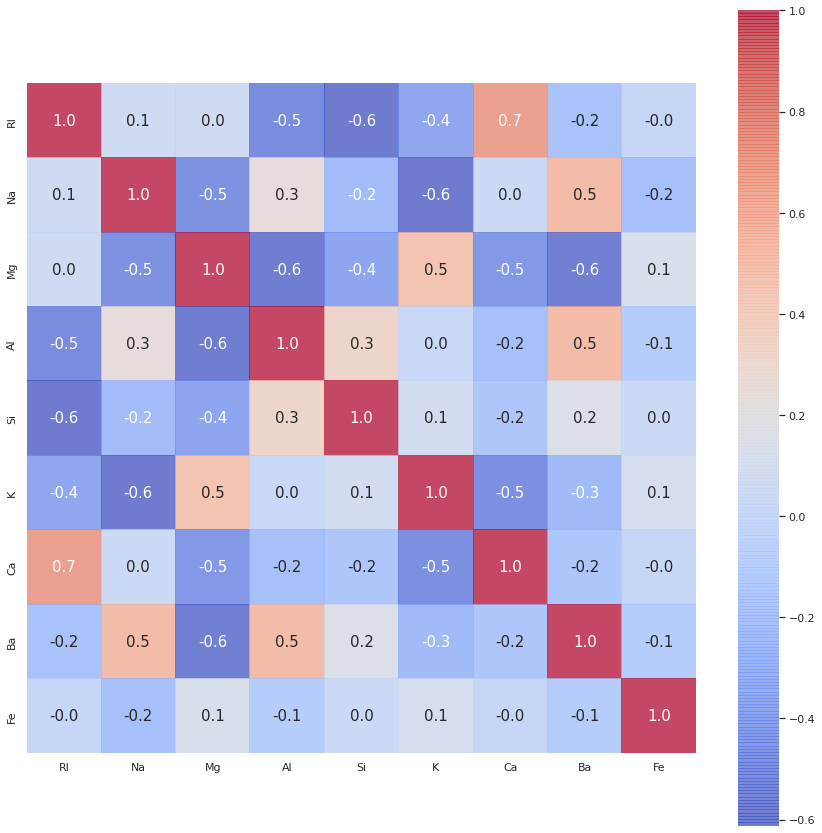

In [ ]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()


In [ ]:
#HMM-Filter
from os import cpu_count

import joblib
import numpy as np
import pandas as pd
from tqdm import tqdm
__version__ = "0.0.14"


def apply_parallel_groups(df_groupby, f, n_jobs=cpu_count(), use_tqdm=False):
    """
    Apply function to each group in parallel, and return combined DataFrame.
    :param df_groupby: Pandas DataFrame GroupBy object
    :param f: function f(group_name:str, group_df:DataFrame) -> DataFrame
    :param n_jobs: run n jobs in parallel
    :param use_tqdm: show progress bar
    :return: concatenated DataFrame
    """

    df_partitions = [(name, group) for name, group in df_groupby]
    df_partitions = tqdm(df_partitions) if use_tqdm else df_partitions

    df_results = joblib.Parallel(n_jobs=n_jobs)(joblib.delayed(f)(df[0], df[1]) for df in df_partitions)
    ret = pd.concat(df_results)
    return ret


class Viterbi:
    """
    Adaptation of Viterbi algorithm to find the most likely sequence of states, as in
    https://en.wikipedia.org/wiki/Viterbi_algorithm#Pseudocode
    T1 and T2 have a similar definition. i,j are swapped: j is the position index and
    i is the state at that position. The number of potential states with probability higher
    than zero varies at each position and the distribution is represented as a sparse matrix
    using a dictionary.
    """

    def __init__(self, A, sequence):
        """
        Initialize Viterbi data structures
        :param A: sparse transition matrix as dict where key is (prev_state,state) and value is transition probability
        :param sequence: sequence of states
        """

        self.sequence = sequence
        self.T = len(sequence)
        self.A = A
        self.T1 = None

    def states_at(self, j):
        """
        Return states whose probab at position j is higher than zero
        :param j: position, 0 <= j <= T-1
        :return: list of states
        """
        return list(self.sequence.iloc[j].keys())

    def max_state_and_prob_at(self, j):
        """
        Return state,prob pair with highest prob among states at position j
        :param j: position, 0 <= j <= T-1
        :return: pair (state,prob)
        """
        return max(self.sequence.iloc[j].items(), key=lambda kv: kv[1])

    def get_state_prob_at(self, j, i):
        """
        Return probab for state i at position j
        :param i: state. e.g., "Zone 101"
        :param j: position, 0 <= j <= T-1
        :return: probability value
        """
        return self.sequence.iloc[j].get(i, 0)

    def get_trans_prob(self, k, i, j):
        """
        Return transition probab from state $k$ to state $i$ from position $j-1$ to position $j$
        :param prev_i: previous state (source)
        :param i: state (destination)
        :return: probability value
        """

        # We are ignoring j. However, it can be used to extend the model to consider an additional
        # discretised temporal dimension.

        return self.A.get((k, i), 0)

    def lg(self, x):
        """
        Returns log of probability. Adding 1E-20 to avoid -inf (log(0)) in presence of zero probabilities,
        that might be returned by get_trans_prob, get_state_prob_at functions. In these cases, we can assume that
        the probability is never exactly zero. This allows us to preserve a ranking between different candidates,
        that otherwise would lead to degenerated log-probability estimates (-inf).
        :param x: probability value
        :return: log of probability
        """
        return np.log(x + 1E-20)

    def f(self, k, i, j):
        # evaluate logp to transition from state k at position j-1 to state i at position j
        # evaluate $T1[k,j-1]*A_{ki}*B_{ij}$
        return self.T1[j - 1][k] + self.lg(self.get_trans_prob(k, i, j)) + self.lg(self.get_state_prob_at(j, i))

    def eval_T1(self):
        """
        Estimate T1 matrix
        :return:
        """

        # initialize T1 matrix: rows are positions in the sequence ranging from 0...T
        # and sparse columns are states whose probability is higher than zero
        self.T1 = [None] * self.T

        # T1[j][i] stores probability of most likely sub-sequence sequence[0...j]
        # with state $i$ at its last position $j$. consequently, T1[T][i] stores the
        # probability that the most likely sequence ends with state $i$.

        # initialize first position
        self.T1[0] = {}
        for i in self.states_at(0):
            self.T1[0][i] = self.lg(self.get_state_prob_at(0, i))

        # now, for each other position in ascending order, initialize T1
        for j in range(1, self.T):
            self.T1[j] = {}
            # for j ranging from 1 to T-1
            for i in self.states_at(j):
                # for all states i at position j whose probability is higher than zero
                self.T1[j][i] = max(
                    [(k, self.f(k, i, j)) for k in self.states_at(j - 1)], key=lambda kv: kv[1])[1]
                # we assign the maximum probability for state $i$ at position $j$ considering all states $k$ at position $j-1$

    def T2(self, j, i):
        """
        Given state $i$ at position $j$, returns most likely state $k$ for position $j-1$
        :param j: state
        :param i: position
        :return: most likely state
        """

        # print("getting T2 of j=", j, "i=", i)
        return max([(k, self.f(k, i, j)) for k in self.states_at(j - 1)], key=lambda kv: kv[1])[0]

    def find_best_last_state_and_prob(self):
        """
        Return state $k$ at last position T-1 and its probability $p$, where $p$ highest at position T-1
        """
        return max([(k, self.T1[self.T - 1][k]) for k in self.states_at(self.T - 1)], key=lambda kv: kv[1])

    def get_best_sequence(self):
        """
        Return list containing most likely sequence of states
        """

        # evaluate T1 matrix
        self.eval_T1()

        # print("T1: ", self.T1)

        # X at position j stores best state at position j
        X = [None] * self.T

        # get best state at position T-1 (last in the sequence, whose range is 0...T-1)
        k, p = self.find_best_last_state_and_prob()
        # print("Best end state is {} with logp {}".format(k, p))

        X[self.T - 1] = k

        for j in reversed(range(1, self.T)):
            # print("estimating x[j-1], j=", j, "X[j]=", X[j])
            # range from j= T-1 to 1
            # T2 at position $j$ stores best state at position $j-1$ given that at position $j$ the state is $X[j]$
            X[j - 1] = self.T2(j, X[j])

        return X

    def get_clean_series(self):
        # print("Initial states = {}".format(self.states_at(0)))
        # print("Final states = {}".format(self.states_at(self.T - 1)))
        # print("Sequence length T = {}".format(self.T))
        return pd.Series(self.get_best_sequence())


class HMMFilter():
    """
    Find most likely sequence of states for a dataset of sequences
    """

    def __init__(self):
        """
        Initialise internal state
        """

        self.A = None

    def fit(self, dataset, session_column, prediction_column, n_jobs=cpu_count(), use_tqdm=False):
        """
        Estimate the transition matrix given a dataset with predicted classes using their normalised
        tranistion frequencies. Sets self.A to the estimated transition Matrix.
        :param dataset: DataFrame with columns [session_column, prediction_column]
        :param session_column: column name of dataset containing the session identifier
        :param prediction_column: column name of dataset containing the predicted class
        :param n_jobs: run n jobs in parallel
        :param use_tqdm: show progress bar
        :return: None
        """

        # make sure that columns exist
        assert prediction_column in dataset.columns and prediction_column in dataset.columns

        # extract list of transition pairs
        def extract_transitions_list(name, df):
            """
            Inner function that extracts sequences of pairs of consecutive predicted states
            :param name: name of the group from GroupBy, that corresponds to the value of session_column for this group
            :param df: rows matching the value of this groups' session ID
            :return: DataFrame containing the pairs of consecutive predicted states
            """
            df['prev_prediction'] = df[prediction_column].shift()
            df.rename(columns={'prev_prediction': 'src', prediction_column: 'dst'}, inplace=True)
            # first row has no prev! remove it
            df = df.iloc[1:]
            return df[['src', 'dst']]

        # extract all pairs of consecutive predicted states in parallel for each session ID
        transition = apply_parallel_groups(dataset.groupby(session_column), extract_transitions_list, n_jobs, use_tqdm)

        def extract_probabs(name, df):
            """
            Extract transition probabilities for a source state
            :param name: source state
            :param df: rows whose source state matches this groups' source state (value of name parameter)
            :return: DataFrame containings triplets source state, destination state, and probability estimate
            """
            df = df.groupby('dst').size().rename('count').reset_index()
            df['src'] = name
            df['probability'] = df['count'] / df['count'].sum()
            return df[['src', 'dst', 'probability']]

        # estimate transition probabilities counting matching pairs
        transition_probabs = apply_parallel_groups(transition.groupby(['src']), extract_probabs, n_jobs, use_tqdm)

        # assign transition matrix as sparse matrix
        self.A = transition_probabs.set_index(['src', 'dst'])["probability"].to_dict()

    def predict(self, dataset, session_column, probabs_column, prediction_column, k=20, n_jobs=cpu_count(),
                use_tqdm=False):
        """
        Predict state at each timestamp for all sessions in dataset, extracting most likely state considering
        state distributions and transition matrix.
        :param dataset: DataFrame of sessions. Rows are sorted by ascending timestamp.
        :param session_column: column name of dataset containing session name
        :param probabs_column: column name of dataset containing state probability distribution as dictionary in the form { state1: probability1, state2: probability2, ...} where all probabilities are higher than sero
        :param prediction_column: column name of dataset where prediction is saved
        :param k: pruning parameter, only top-k probabilities are retained for each state
        :param n_jobs: run n jobs in parallel
        :param use_tqdm: show progress bar
        :return: DataFrame dataset with mutated row order and new column prediction_column
        """

        # Limit each sample's class distribution to its top-k.
        # This to limit the number of possible worlds, resulting in a faster, approximated evaluation.
        # In most cases, this results in the very same output of the complete evaluation.
        def limit_topk(d, k):
            if len(d) <= k:
                return d
            l_topk = sorted(d.items(), key=lambda kv: kv[1], reverse=True)[:k]
            norm_factor = 1 / sum(map(lambda kv: kv[1], l_topk))
            return dict(list(map(lambda kv: (kv[0], kv[1] * norm_factor), l_topk)))

        dataset[probabs_column] = dataset[probabs_column].apply(lambda d: limit_topk(d, k))

        def predict_sequence(name, df):
            """
            Predict the most likely seuence for one session
            :param name: session ID
            :param df: rows matching session ID
            :return: input DataFrame with additional column, prediction_column, containing most likely state for each row
            """
            df.reset_index(drop=True, inplace=True)
            df[prediction_column] = Viterbi(self.A, df[probabs_column]).get_clean_series()
            return df

        # add column containing prediction according to the markov model prediction in parallel
        return apply_parallel_groups(dataset.groupby(session_column), predict_sequence, n_jobs, use_tqdm=use_tqdm)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from os import cpu_count
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [ ]:
# cross-validate random forest model on training dataset
clf = RandomForestClassifier(n_jobs=cpu_count())

# print average accuracy across all folds
avg_accuracy = np.mean(cross_validate(clf, x_train, y_train, cv=2, scoring="accuracy")["test_score"])
avg_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.7544122544122545

In [ ]:
# Instantiate random forest classifier and fit to training data
clf = RandomForestClassifier(n_jobs=cpu_count())
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_jobs=2)

In [ ]:
hmmfilter = HMMFilter()
hmmfilter.fit(data, session_column="RI", prediction_column="glass_type")

In [ ]:
data_category_range = data['glass_type'].unique()
data_category_range = data_category_range.tolist()
for i,value in enumerate(data_category_range):
  data[data['glass_type'] == value].to_csv(r'glass'+str(value)+r'.csv',index = False, na_rep = 'N/A')

In [ ]:
hmmfilter.predict(data, session_column="RI", prediction_column="glass_type",probabs_column="glass_type" )

TypeError: ignored

### Gaussian HMM

In [ ]:
!pip install hmmlearn==0.1.1 

  Created wheel for hmmlearn: filename=hmmlearn-0.1.1-cp37-cp37m-linux_x86_64.whl size=300267 sha256=02b6888aee9ff9f50106a59751befd4596377c9522c448f5fc3985619862d6d9
  Stored in directory: /root/.cache/pip/wheels/29/85/38/83c81aae79ab019eb6634e8bb7c03547a5f72685f1b8f2557e
Successfully built hmmlearn
  Attempting uninstall: hmmlearn
    Found existing installation: hmmlearn 0.2.7
    Uninstalling hmmlearn-0.2.7:
      Successfully uninstalled hmmlearn-0.2.7


In [ ]:
import hmmlearn
from sklearn.mixture import GaussianMixture

In [ ]:
hmmModel = GaussianMixture()

In [ ]:
df = pd.read_csv("glass.csv", header = 0, index_col='Id number')

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
n_fits = 50
for i in range(n_fits): 
  hmmModel.fit(train_X)

In [ ]:
# class1 = pd.read_csv("glass1.csv", header=0).iloc[:, :8].values.tolist()
# class2 = pd.read_csv("glass2.csv", header=0).iloc[:, :8].values.tolist()
# class3 = pd.read_csv("glass3.csv", header=0).iloc[:, :8].values.tolist()
# class5 = pd.read_csv("glass5.csv", header=0).iloc[:, :8].values.tolist()
# class6 = pd.read_csv("glass6.csv", header=0).iloc[:, :8].values.tolist()
# class7 = pd.read_csv("glass7.csv", header=0).iloc[:, :8].values.tolist()

class1 = pd.read_csv("glass1.csv", header=0).iloc[:, :8]
class2 = pd.read_csv("glass2.csv", header=0).iloc[:, :8]
class3 = pd.read_csv("glass3.csv", header=0).iloc[:, :8]
class5 = pd.read_csv("glass5.csv", header=0).iloc[:, :8]
class6 = pd.read_csv("glass6.csv", header=0).iloc[:, :8]
class7 = pd.read_csv("glass7.csv", header=0).iloc[:, :8]

In [ ]:
x_trainc1, x_testc1 = train_test_split(class1, test_size=.3, random_state=0)
x_trainc2, x_testc2 = train_test_split(class2, test_size=.3, random_state=0)
x_trainc3, x_testc3 = train_test_split(class3, test_size=.3, random_state=0)
x_trainc5, x_testc5 = train_test_split(class5, test_size=.3, random_state=0)
x_trainc6, x_testc6 = train_test_split(class6,  test_size=.3, random_state=0)
x_trainc7, x_testc7 = train_test_split(class7,  test_size=.3, random_state=0)

x_test = pd.concat([x_testc1, x_testc2,x_testc3,x_testc5 ,x_testc6 ,x_testc7])
y_test = np.array([1] * x_testc1.shape[0] + [2] * x_testc2.shape[0] + [3] * x_testc3.shape[0] + [5] * x_testc5.shape[0] + [6] * x_testc6.shape[0] + [7] * x_testc7.shape[0])

In [ ]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba
26,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.00
27,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00
48,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00
22,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.00
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00
51,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00
59,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.00
34,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.00
69,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00


In [ ]:
model1 =GaussianMixture(n_components=2, covariance_type = "diag").fit(x_trainc1)
model2=GaussianMixture(n_components=2, covariance_type = "diag" ).fit(x_trainc2)
model3 =GaussianMixture(n_components=2,  covariance_type = "diag").fit(x_trainc3)
model5=GaussianMixture(n_components=2, covariance_type = "diag").fit(x_trainc5)
model6 =GaussianMixture(n_components=2, covariance_type = "diag").fit(x_trainc6)
model7=GaussianMixture(n_components=2, covariance_type = "diag").fit(x_trainc7)


In [ ]:
pred_prob1 = pd.DataFrame(model1.predict_proba(x_test)).loc[:,1]
pred_prob2 = pd.DataFrame(model2.predict_proba(x_test)).loc[:,1]
pred_prob3 = pd.DataFrame(model3.predict_proba(x_test)).loc[:,1]
pred_prob5 = pd.DataFrame(model5.predict_proba(x_test)).loc[:,1]
pred_prob6 = pd.DataFrame(model6.predict_proba(x_test)).loc[:,1]
pred_prob7 = pd.DataFrame(model7.predict_proba(x_test)).loc[:,1]

In [ ]:
class_probabilities = pd.concat([pred_prob1, pred_prob2, pred_prob3, pred_prob5, pred_prob6, pred_prob7], axis=1)

In [ ]:
class_probabilities.columns = [1,2,3,5,6,7]

In [ ]:
prediction_with_wrong_index = list(np.array(class_probabilities).argmax(axis=1))


In [ ]:
index_dict = {
    0:1,
    1:2,
    2:3,
    3:5,
    4:6,
    5:7
}

pred = np.array([index_dict[x] for x in prediction_with_wrong_index])


In [ ]:
from sklearn.metrics import confusion_matrix

confustion_matrix = pd.DataFrame(confusion_matrix(y_test, pred))

In [ ]:
confustion_matrix.columns = ["glass 1","glass 2","glass 3","glass 5","glass 6","glass 7"]
confustion_matrix.index = ["glass 1","glass 2","glass 3","glass 5","glass 6","glass 7"]

In [ ]:
confustion_matrix

,glass 1,glass 2,glass 3,glass 5,glass 6,glass 7
glass 1,6,12,0,0,0,3
glass 2,2,15,0,0,0,4
glass 3,1,3,0,0,0,1
glass 5,3,0,0,0,0,0
glass 6,3,0,0,0,0,0
glass 7,7,0,0,0,0,0


In [ ]:
!pip install scipy

In [ ]:
import sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.27      0.29      0.28        21
           2       0.50      0.71      0.59        21
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         7

    accuracy                           0.35        60
   macro avg       0.13      0.17      0.14        60
weighted avg       0.27      0.35      0.30        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = confustion_matrix.sum(axis=0) - np.diag(confustion_matrix)  
FN = confustion_matrix.sum(axis=1) - np.diag(confustion_matrix)
TP = np.diag(confustion_matrix)
TN = confustion_matrix.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
print("Sensitivity:")
print(TPR)

Sensitivity:
glass 1    0.285714
glass 2    0.714286
glass 3    0.000000
glass 5    0.000000
glass 6    0.000000
glass 7    0.000000
dtype: float64


In [ ]:
print("Specificity:")
print(TNR)

Specificity:
glass 1    0.589744
glass 2    0.615385
glass 3    1.000000
glass 5    1.000000
glass 6    1.000000
glass 7    0.849057
dtype: float64


In [ ]:
print("Total Accuracy:")
print(ACC)

Total Accuracy:
glass 1    0.483333
glass 2    0.650000
glass 3    0.916667
glass 5    0.950000
glass 6    0.950000
glass 7    0.750000
dtype: float64


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


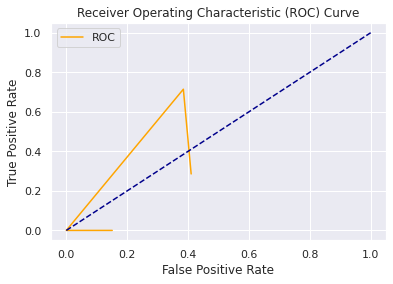

In [ ]:
plot_roc_curve(FPR, TPR)